In [1]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
from src.model.util import vis_transport

In [2]:
with open("scratch/Cycle_Graphs_log.pkl", "rb") as f: 
    cycle_info = pickle.load(f)

with open("scratch/Path_Graphs_log.pkl", "rb") as f: 
    path_info = pickle.load(f)

with open("scratch/Star_Graphs_log.pkl", "rb") as f: 
    star_info = pickle.load(f)

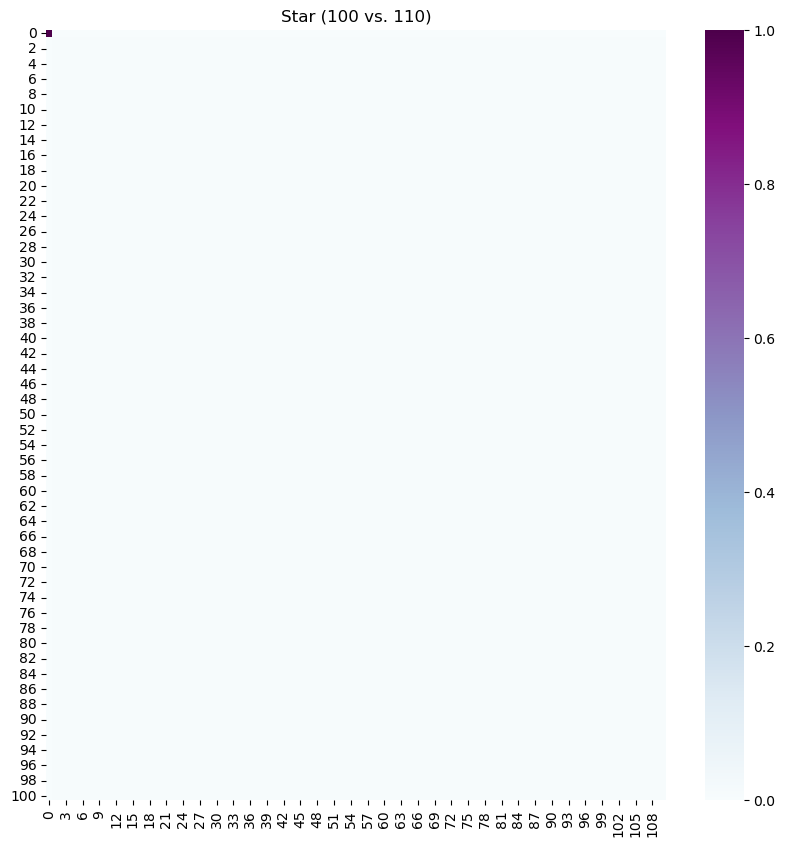

In [3]:
vis_transport(star_info["trans"][(100, 110)], "Star (100 vs. 110)", annot=False, ratio=(10, 10))

In [4]:
trans = star_info["trans"][(100, 110)]

In [5]:
star_info["gw_dist"][(25, 50)]

0.038733627882443965

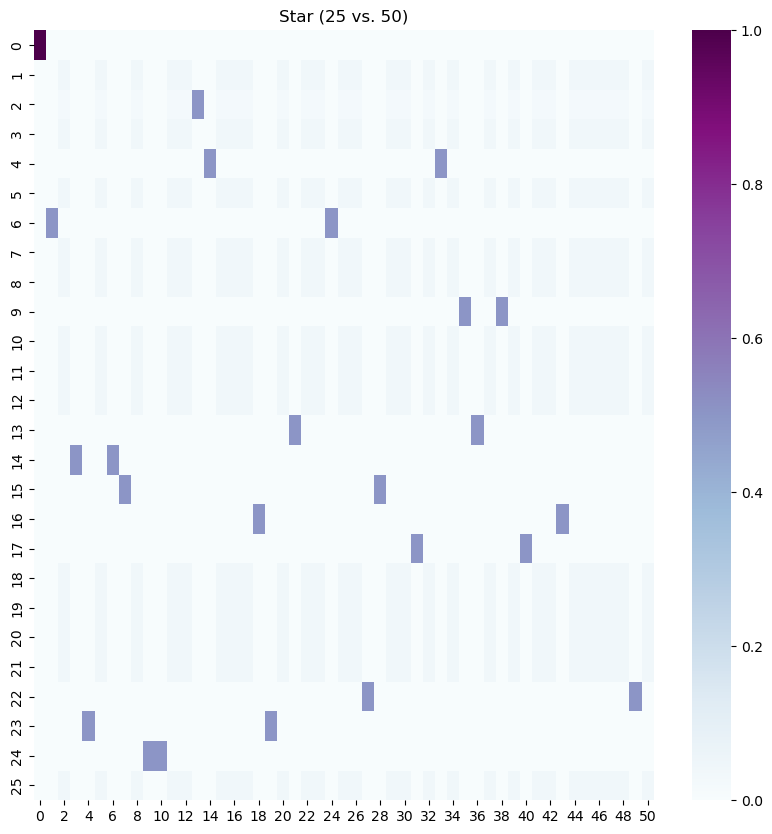

In [7]:
trans = star_info["trans"][(25, 50)]
vis_transport(trans, "Star (25 vs. 50)", annot=False, ratio = (10, 10))

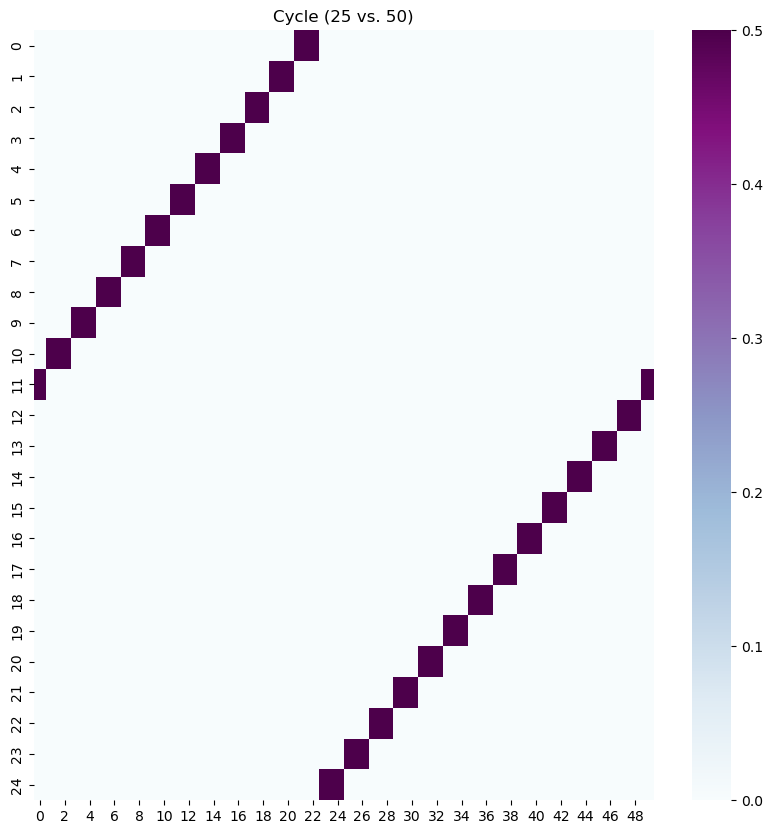

In [8]:
trans = cycle_info["trans"][(25, 50)]
vis_transport(trans, "Cycle (25 vs. 50)", annot=False, ratio = (10, 10))

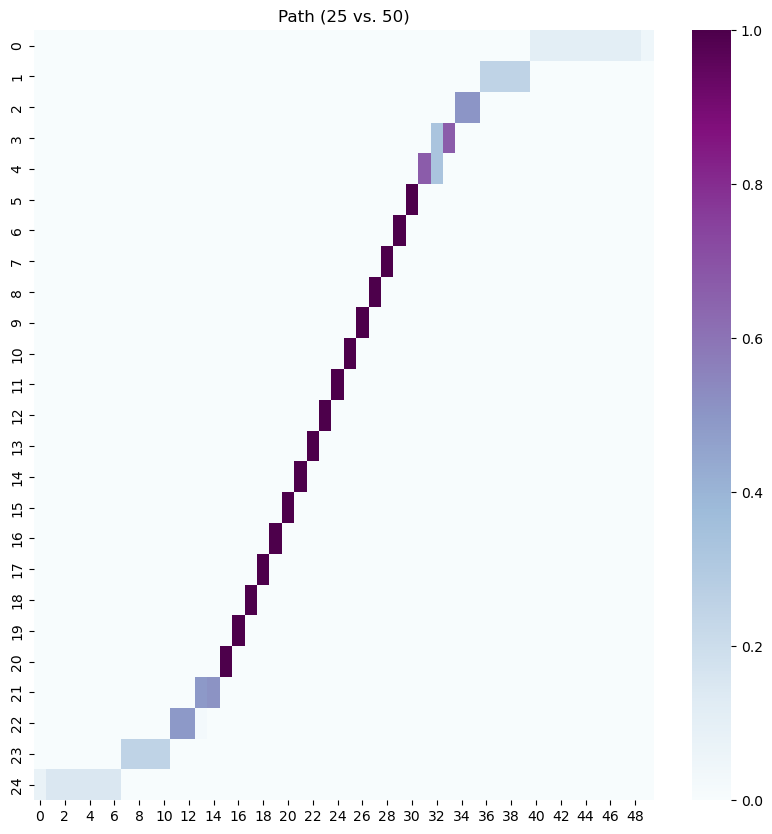

In [9]:
trans = path_info["trans"][(25, 50)]
vis_transport(trans, "Path (25 vs. 50)", annot=False, ratio = (10, 10))